## 2.1 분류(Clsassification)와 회귀(Regression)  
1. 분류  
a. 분류는 미리 정의된 가능성 있는 여러 클래스 레이블 중 하나를 예측  
b. 두 개의 클래스로 분류하는 건 이진 분류(binary classification), 셋 이상의 클래스로 분류하는 건 다중 분류(multiclass classification) 이라 함  

2. 회귀  
a. 연속적인 숫자(실수)를 예측  
b. 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측 또는 특정 농산물의 올 해 수확량 예측  
c. 분류문제와 달리 회귀문제에서는 출력값의 작은 차이는 문제가 되지 않음

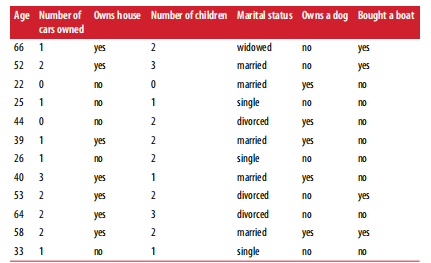

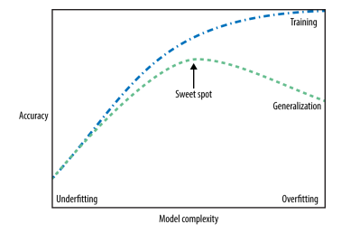

## 2.2 일반화, 과대적합, 과소적합  
- 지도학습에서 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 수 있음  
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다면 이를 훈련 세트에서 테스트 세트로 일반화(generalization)되었다고 함  
- 보유하고 있는 모든 정보를 이용해 만든 복잡한 모델은 훈련 세트에만 최적화되어 새로운 데이터에 일반화 되기 어렵다. 이를 과대적합(overfitting)이라 함  
(45세 이상이고, 자녀가 셋 미만이며 이혼하지 않은 고객은 요트를 살 것이다.)  
- 모델이 너무 간단하면 데이터의 다양성을 잡아내지 못하고 정확도도 떨어짐, 이를 과소적합(underfitting)이라 함 (집이 있는 사람은 모두 요트를 사려고 함)  
- 모델이란, 수학적 알고리즘의 표현식  
![image.png](attachment:image.png)
- 다음 그림과 같이 일반화 성능이 최대가 되는 최적점에 있는 모델을 찾아야 함  
![image.png](attachment:image.png)

1. 데이터 세트에 다양한 데이터 포인트가 많을수록(feature의 수가 많을수록) 과대적합 없이 더 복잡한 모델을 구축할 수 있음  

## 2.3 지도 학습 알고리즘  
1. 예제에 사용할 데이터 셋  
a. forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋 feature 2개, target 1  
- x축은 첫 번째 특성, y축은 두 번째 특성으로 그래프 작성

In [1]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


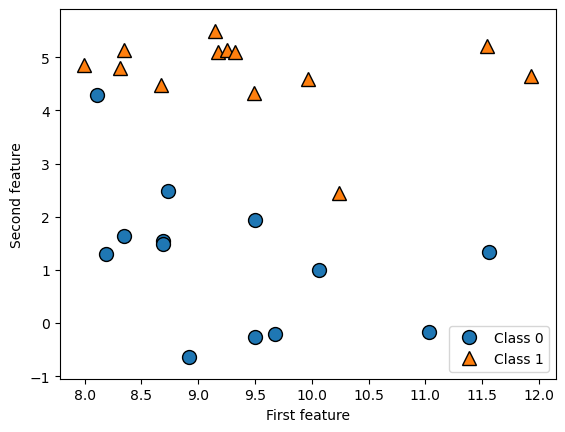

X.shape: (26, 2)


In [2]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
print("X.shape:", X.shape)

b. 회귀 알고리즘에는 인위적으로 만든 wave 데이터셋을 사용  
- 입력 특성 한 개와 target 변수를 가짐  
- 특성을 x축, target을 y축

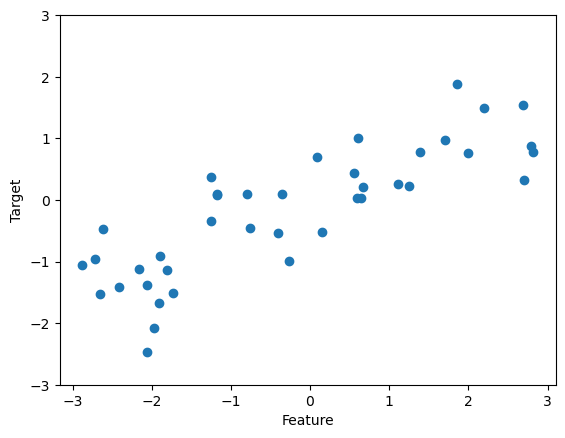

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

c. scikit-learn 에 들어 있는 실제 데이터셋 사용  
- 유방암 종양의 임상 데이터를 기록해 놓은 위스콘신 유방암 데이터 셋(cancer)  
- 각 종양은 양성(benign)과 악성(malignant)로 레이블 되어 있음  
- 조직 데이터를 기반으로 종양이 악성인지를 예측하도록 학습하는 것이 과제

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [6]:
import numpy as np

print("클래스별 샘플 수:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
#np.bincount : 배열 내 각 occurrence 수

클래스별 샘플 수:
{'malignant': 212, 'benign': 357}


In [7]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 2. k-NN
a. k-Nearest Neighbors  
- k-NN은 가장 가까운 훈련 데이터 샘플을 최근접 이웃으로 찾아 예측에 사용  

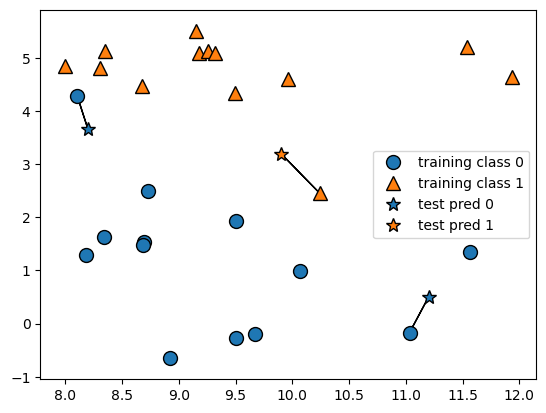

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

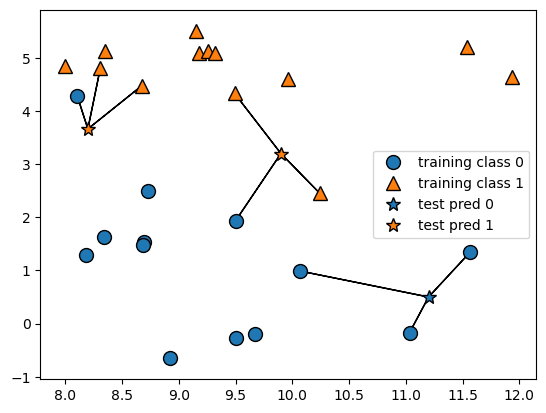

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


## KNeighborsClassifier 분석  
- 2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그려봄  
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하여 결정 경계(decision boundary)를 확인함  
- 다음은 이웃이 하나, 셋, 아홉 개일 때의 결정 경계를 보여줌

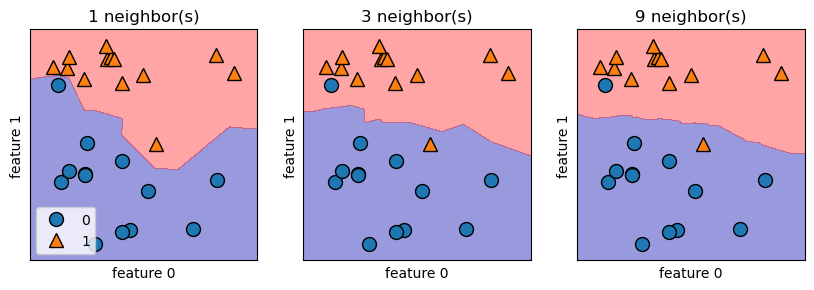

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)
plt.show()

- 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라감  
- 이웃의 수를 늘릴 수록 결정 경계는 더 부드러워짐, 부드러운 경계는 더 단순한 모델을 의미  
- 이웃을 적게 사용하면 모델의 복잡도가 증가(Overfitting), 많이 사용하면 복잡도는 감소(Underfitting)  
- 훈련 데이터 전체 수를 이웃의 수로 지정하는 극단적인 경우, 모든 테스트 포인트가 같은 이웃을 가지므로 테스트 포인트에 대한 예측은 모두 같은 값이 나옴  
- 즉 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨

- 모델의 복잡도와 일반화 사이의 관계를 입증해 봄  
- 실제 데이터인 유방암 데이터셋을 사용  
- 훈련 세트와 테스트 세트로 나눔  
- 이웃의 수를 달리하면서 훈련 세트와 테스트 세트의 성능을 평가함

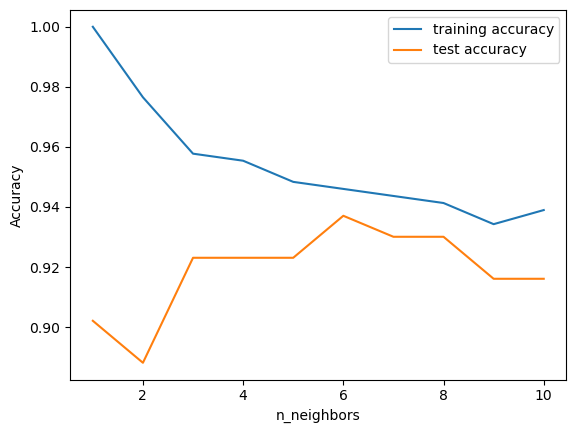

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# stratify : 이 옵션을 target으로 지정하면 train, test set으로 분리할 때 각 클래스(양성, 음성) 비율을 유지하게 함

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- Overfitting과 Underfitting의 특징을 잘 보여줌  
- 최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽  
- 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 감소  
- 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮음  
- 1-NN 이 모델을 너무 복잡하게 만든다는 것을 설명함  
- 10-NN 은 모델이 너무 단순해서 정확도는 떨어짐  
- 정확도가 가장 좋을 때는 중간 정도인 6-NN 임

## k-neighbors regression  
- wave 데이터 셋을 이용해서 회귀분석에 사용  
- x 축에 세 개의 테스트 데이터를 흐린 별 모양으로 표시  
- 최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 target 값임

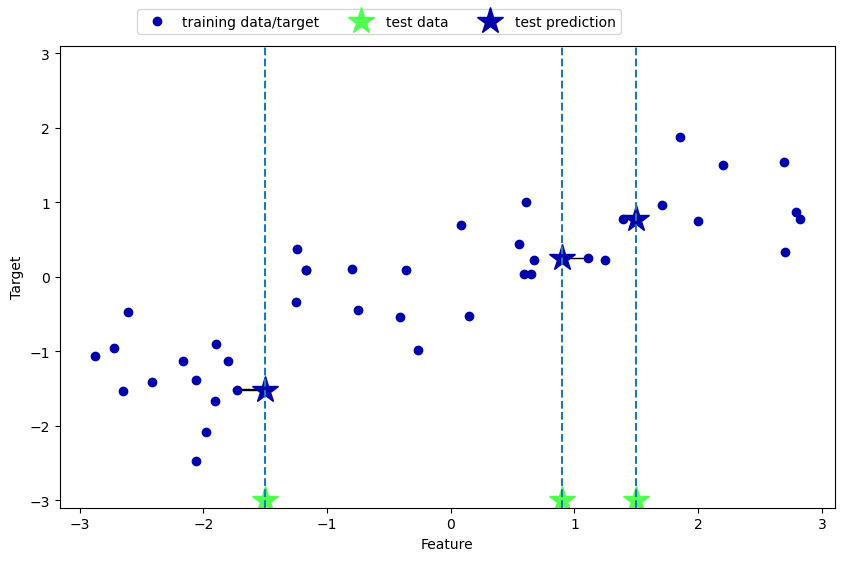

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

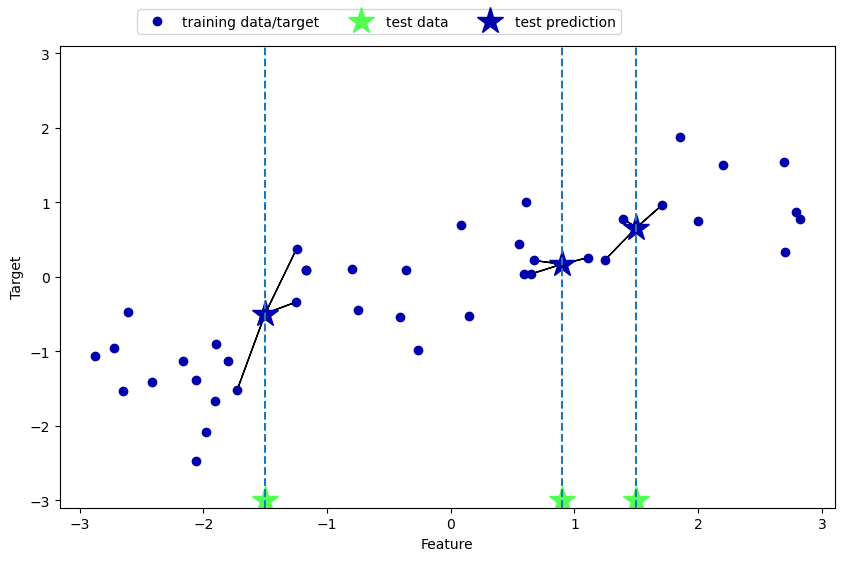

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

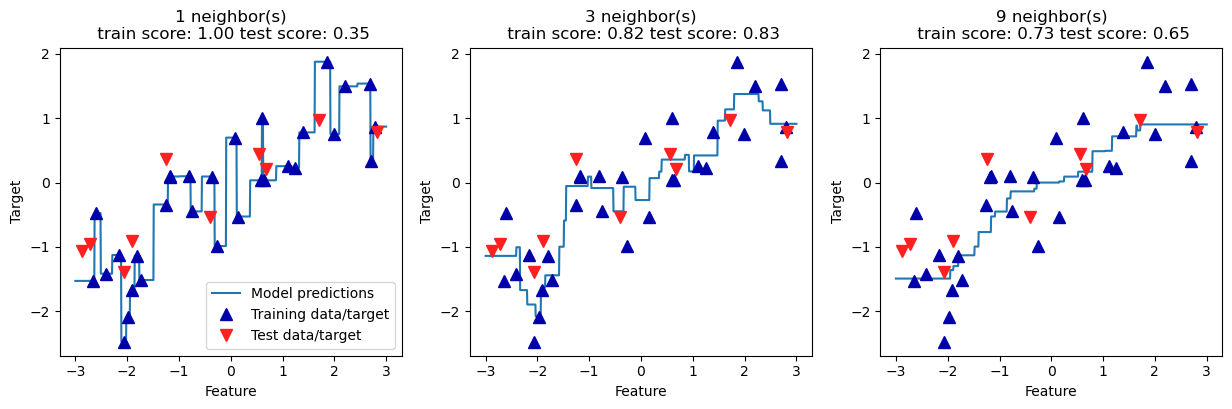

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()

Logistic Function (비선형 함수)

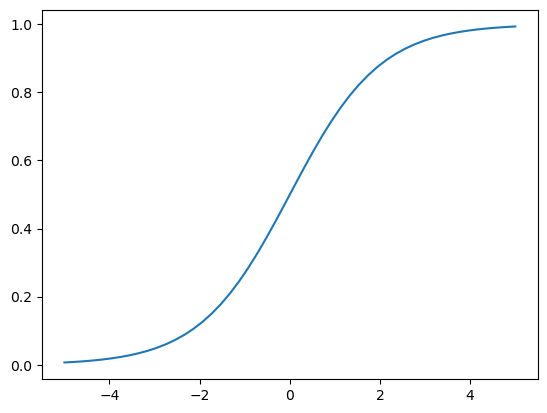

In [2]:
#sigmoid
import numpy as np
import matplotlib.pyplot as plt
def sigmoid_function(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-5, 5)
y = sigmoid_function(x)
plt.plot(x, y)
plt.show()

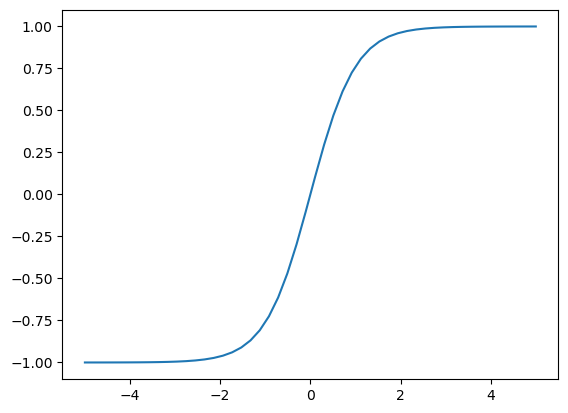

In [4]:
#tanh
import numpy as np
import matplotlib.pyplot as plt
def tanh_function(x):
    return np.tanh(x)
x = np.linspace(-5, 5)
y = tanh_function(x)
plt.plot(x, y)
plt.show()

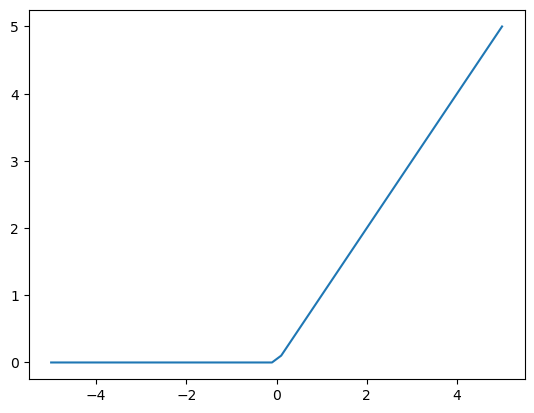

In [5]:
#relu
import numpy as np
import matplotlib.pyplot as plt
def relu_function(x):
    return np.where(x <= 0, 0, x)
x = np.linspace(-5, 5)
y = relu_function(x)
plt.plot(x, y)
plt.show()

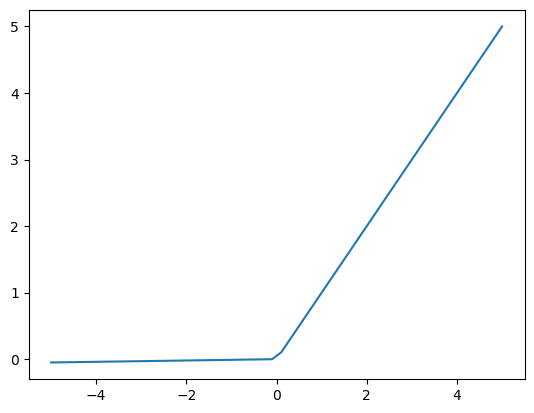

In [6]:
#leaky relu
import numpy as np
import matplotlib.pyplot as plt
def leaky_relu_function(x):
    return np.where(x <= 0, 0.01*x, x)
x = np.linspace(-5, 5)
y = leaky_relu_function(x)
plt.plot(x, y)
plt.show()

In [8]:
#softmax
import numpy as np
def softmax_function(x):
    return np.exp(x)/np.sum(np.exp(x)) 
y = softmax_function(np.array([1,2,3]))
print(y)

[0.09003057 0.24472847 0.66524096]
